# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets
import requests
import time

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

print("***************************************************************************************")
# df.head(n).to_csv('yourfileout.csv', encoding='utf-8')
# city_logging.info('dataframe head - {}'.format(cities.head()))
print("Do I need to include logging in addition to wrting out the .csv???")
print("***************************************************************************************")
    
# Print the city count to confirm sufficient count
print(len(cities))
print(cities)
print("*******************************************************************************************")
print("Temporarily reducging cities from cities to cities[0:10] so only get 10 cities intially")
print("before calling api.openweathermap.org since they have limits") 
print("I believe 60 calls/minute and 1M calls/month per month)")
cities = cities[0:10]
print("*******************************************************************************************")
print(cities)

***************************************************************************************
Do I need to include logging in addition to wrting out the .csv???
***************************************************************************************
651
['rikitea', 'jamestown', 'dikson', 'qaanaaq', 'ambo', 'sao filipe', 'sindou', 'general roca', 'punta arenas', 'iberia', 'grindavik', 'nikolskoye', 'uchiza', 'puri', 'ushuaia', 'atuona', 'busselton', 'presidencia roque saenz pena', 'lloydminster', 'bilibino', 'bluff', 'hobart', 'kapaa', 'thompson', 'sibolga', 'kosa', 'iqaluit', 'hermanus', 'mataura', 'rio gallegos', 'nichinan', 'yellowknife', 'tyret pervaya', 'bredasdorp', 'aklavik', 'cape town', 'ribeira grande', 'anchorage', 'lavrentiya', 'pangody', 'albany', 'cidreira', 'huarmey', 'taksimo', 'castro', 'nouakchott', 'eureka', 'provideniya', 'rosario', 'vostok', 'saint-augustin', 'vaini', 'salamanca', 'mutsamudu', 'mumford', 'mogadishu', 'angoram', 'baixa grande', 'tokur', 'bangor', 'butaritar

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# set up lists to hold reponse info
lat = []
lon = []
temp = []
temp_max = []
humidity=[]
clouds=[]
wind=[]
del_cities = []
del_cities_index = []
i = 0
city_counter=0

print("cities")
print(cities)
# Loop through the list of cities and perform a request for data on each
for city in cities:
    print(f'city is {city}')
    try:
        response = requests.get(query_url + city).json()
        time.sleep(0.05)
        lat.append(response['coord']['lat'])
        print(f"The latitude information for city {city} #{city_counter} received is: {lat}")
        lon.append(response['coord']['lon'])
        print(f"The longitude information for city {city} #{city_counter} received is: {lon}")
        temp.append(response['main']['temp'])
        print(f"The temperature information for city {city} #{city_counter} received is: {temp}")
        temp_max.append(response['main']['temp_max'])
        print(f"The temperature Maximum information for city {city} #{city_counter} received is: {temp_max}")
        humidity.append(response['main']['humidity'])
        print(f"The humidty information for city {city} #{city_counter} received is: {humidity}")
        clouds.append(response['clouds']['all'])
        print(f"The cloudiness information for city {city} #{city_counter} received is: {clouds}")
        wind.append(response['wind']['speed'])
        print(f"The windiness information for city {city} #{city_counter} received is: {wind}")
        
    except KeyError:
        print()
        print("Oops!  That might not be a valid data point.  Try again... and later remove the invalid city(s) from cities")
        print(f'Issue with {city} of index {city_counter}')
        del_cities_index.append(city_counter)
        print('len(del_cities_index)')
        print(len(del_cities_index))        
        
    city_counter+=1
print('cities')
print(cities)

print('len(del_cities_index)')
print(len(del_cities_index))

if len(del_cities_index)>0:
    print("inside if")
    for i in range(len(del_cities_index)-1, -1, -1):
        print("inside for")
        print(f'i={i}')
        print(f'del_cities_index[i]')
        print(del_cities_index[i])
        j=int((del_cities_index[i]))
        print(f'j={j}')
        del cities[j]
print('cities after del')
print(cities)

# from the list
print(f'cities is now {cities}')
print()
    
# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city  

# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
print(f"The weather API responded with: {weather_json}.")

cities
['rikitea', 'jamestown', 'dikson', 'qaanaaq', 'ambo', 'sao filipe', 'sindou', 'general roca', 'punta arenas', 'iberia']
city is rikitea
The latitude information for city rikitea #0 received is: [-23.1203]
The longitude information for city rikitea #0 received is: [-134.9692]
The temperature information for city rikitea #0 received is: [26.22]
The temperature Maximum information for city rikitea #0 received is: [26.22]
The humidty information for city rikitea #0 received is: [68]
The cloudiness information for city rikitea #0 received is: [1]
The windiness information for city rikitea #0 received is: [6.65]
city is jamestown
The latitude information for city jamestown #1 received is: [-23.1203, 42.097]
The longitude information for city jamestown #1 received is: [-134.9692, -79.2353]
The temperature information for city jamestown #1 received is: [26.22, 1.82]
The temperature Maximum information for city jamestown #1 received is: [26.22, 1.82]
The humidty information for city jame

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

 # create a data frame from cities, lat, temp, etc
print(f'City {cities}')
print(f'Lat {lat}')
      
weather_dict = {
    "city": cities,
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "TempMax": temp_max,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed":wind 
}

print("weather_dict")
print(weather_dict)
print()

weather_data = pd.DataFrame(weather_dict)
print(weather_data)

# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
weather_data.to_csv(output_data_file, encoding="utf-8", index=False)

City ['rikitea', 'jamestown', 'dikson', 'qaanaaq', 'ambo', 'sao filipe', 'sindou', 'general roca', 'punta arenas', 'iberia']
Lat [-23.1203, 42.097, 73.5069, 77.484, -10.1308, 14.8961, 10.6667, -39.0333, -53.15, 29.9502]
weather_dict
{'city': ['rikitea', 'jamestown', 'dikson', 'qaanaaq', 'ambo', 'sao filipe', 'sindou', 'general roca', 'punta arenas', 'iberia'], 'lat': [-23.1203, 42.097, 73.5069, 77.484, -10.1308, 14.8961, 10.6667, -39.0333, -53.15, 29.9502], 'lon': [-134.9692, -79.2353, 80.5464, -69.3632, -76.2047, -24.4956, -5.1667, -67.5833, -70.9167, -91.7507], 'temp': [26.22, 1.82, -16.73, -29.62, 19.92, 24.89, 26.72, 35.93, 11.06, 18.77], 'TempMax': [26.22, 1.82, -16.73, -29.62, 19.92, 24.89, 26.72, 35.93, 11.06, 20.03], 'Humidity': [68, 100, 95, 81, 73, 61, 15, 15, 46, 36], 'Cloudiness': [1, 100, 99, 99, 92, 75, 5, 0, 75, 0], 'Wind Speed': [6.65, 6.12, 9.76, 2.66, 3.69, 1.09, 2.52, 7.04, 12.86, 5.14]}

           city      lat       lon   temp  TempMax  Humidity  Cloudiness  \
0  

In [6]:
# Display the DataFrame
weather_data

,city,lat,lon,temp,TempMax,Humidity,Cloudiness,Wind Speed
0,rikitea,-23.1203,-134.9692,26.22,26.22,68,1,6.65
1,jamestown,42.0970,-79.2353,1.82,1.82,100,100,6.12
2,dikson,73.5069,80.5464,-16.73,-16.73,95,99,9.76
3,qaanaaq,77.4840,-69.3632,-29.62,-29.62,81,99,2.66
4,ambo,-10.1308,-76.2047,19.92,19.92,73,92,3.69
5,sao filipe,14.8961,-24.4956,24.89,24.89,61,75,1.09
6,sindou,10.6667,-5.1667,26.72,26.72,15,5,2.52
7,general roca,-39.0333,-67.5833,35.93,35.93,15,0,7.04
8,punta arenas,-53.1500,-70.9167,11.06,11.06,46,75,12.86
9,iberia,29.9502,-91.7507,18.77,20.03,36,0,5.14


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 


In [7]:
cities_high_humidity = []
city_counter=0
print("*******************************************************************************************")
print("Need to change humidity[city_counter]) > 80 from 80 to 100")
print("*******************************************************************************************")
for city in cities:
    if int(humidity[city_counter]) > 80:
        print(f"The humidty information for city {city} #{city_counter} received is: {humidity[city_counter]}")
        # Create a new list to track high humifity index values
        cities_high_humidity.append(city_counter)
        print(f"{city} with city_counter of {city_counter} has humidty >80 so need to remove later")
    else:
        print("Skip since no humidity >80")
    city_counter+=1
print("Latest cities_high_humidity")
print(cities_high_humidity)

*******************************************************************************************
Need to change humidity[city_counter]) > 80 from 80 to 100
*******************************************************************************************
Skip since no humidity >80
The humidty information for city jamestown #1 received is: 100
jamestown with city_counter of 1 has humidty >80 so need to remove later
The humidty information for city dikson #2 received is: 95
dikson with city_counter of 2 has humidty >80 so need to remove later
The humidty information for city qaanaaq #3 received is: 81
qaanaaq with city_counter of 3 has humidty >80 so need to remove later
Skip since no humidity >80
Skip since no humidity >80
Skip since no humidity >80
Skip since no humidity >80
Skip since no humidity >80
Skip since no humidity >80
Latest cities_high_humidity
[1, 2, 3]


In [8]:
#  Get the indices of cities that have humidity over 100%.
print("Latest cities_high_humidity")
print(cities_high_humidity)

Latest cities_high_humidity
[1, 2, 3]


In [9]:
# Make a new DataFrame equal to the city data (aka weather_data) to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=weather_data
if len(cities_high_humidity) > 0:
    print(f"have high humidity data for city index #(s) {cities_high_humidity}")
    # dropping a row(s) from actual dataframe
    #df.drop(['c', 'd'], inplace = True )
    clean_city_data=clean_city_data.drop(cities_high_humidity, inplace=False) 
else:
    print("No high humidity data") 
print("weather_data") 
print(weather_data)
print()
print("clean_city_data") 
print(clean_city_data)
print()

clean_city_data.reset_index(inplace=True)
print("clean_city_data after reset index") 
print(clean_city_data)

#print("dtypes()")
#print(clean_city_data.dtypes)

have high humidity data for city index #(s) [1, 2, 3]
weather_data
           city      lat       lon   temp  TempMax  Humidity  Cloudiness  \
0       rikitea -23.1203 -134.9692  26.22    26.22        68           1   
1     jamestown  42.0970  -79.2353   1.82     1.82       100         100   
2        dikson  73.5069   80.5464 -16.73   -16.73        95          99   
3       qaanaaq  77.4840  -69.3632 -29.62   -29.62        81          99   
4          ambo -10.1308  -76.2047  19.92    19.92        73          92   
5    sao filipe  14.8961  -24.4956  24.89    24.89        61          75   
6        sindou  10.6667   -5.1667  26.72    26.72        15           5   
7  general roca -39.0333  -67.5833  35.93    35.93        15           0   
8  punta arenas -53.1500  -70.9167  11.06    11.06        46          75   
9        iberia  29.9502  -91.7507  18.77    20.03        36           0   

   Wind Speed  
0        6.65  
1        6.12  
2        9.76  
3        2.66  
4        3.69  


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

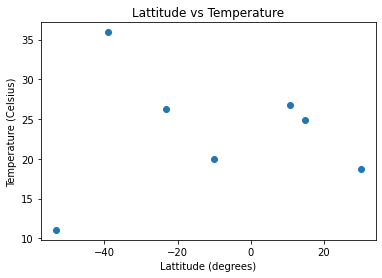

In [10]:
# print("clean_city_data") 
# print(clean_city_data)

# Prepare scatter plot  
plt.scatter(clean_city_data["lat"],clean_city_data["temp"])
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Temperature (Celsius)")
plt.title('Lattitude vs Temperature')
# Save the figure
plt.savefig("output_data/lat_temp.png")
# Display the garph
plt.show()

## Latitude vs. Humidity Plot

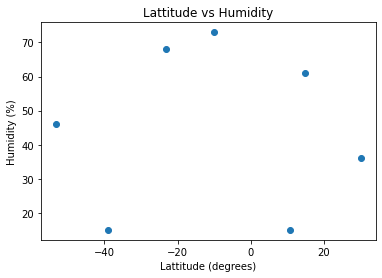

In [11]:
# Prepare scatter plot  
plt.scatter(clean_city_data["lat"],clean_city_data["Humidity"])
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Humidity (%)")
plt.title('Lattitude vs Humidity')
# Save the figure
plt.savefig("output_data/lat_hum.png")
# Display the garph
plt.show()

## Latitude vs. Cloudiness Plot

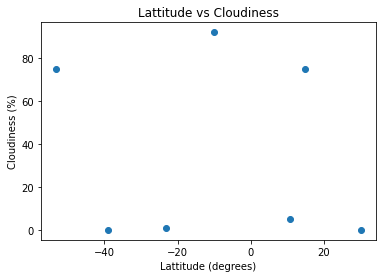

In [12]:
# Prepare scatter plot  
plt.scatter(clean_city_data["lat"],clean_city_data["Cloudiness"])
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Cloudiness (%)")
plt.title('Lattitude vs Cloudiness')
# Save the figure
plt.savefig("output_data/lat_cloud.png")
# Display the garph
plt.show()

## Latitude vs. Wind Speed Plot

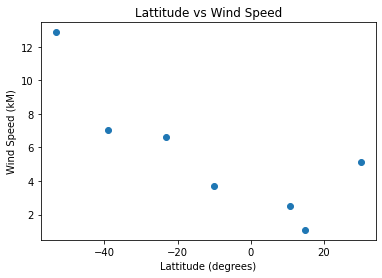

In [13]:
# Prepare scatter plot  
plt.scatter(clean_city_data["lat"],clean_city_data["Wind Speed"])
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Wind Speed (kM)")
plt.title('Lattitude vs Wind Speed')
# Save the figure
plt.savefig("output_data/lat_wind.png")
# Display the garph
plt.show()

## Linear Regression

The correlation between both factors is 0.04
line_eq is: y = 0.01x + 23.45


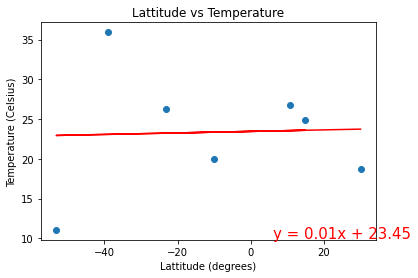

In [14]:
# Calculate the correlation coefficient and linear regression model 

x_values = clean_city_data["lat"]
y_values = clean_city_data["temp"]

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Temperature (Celsius)")
plt.title('Lattitude vs Temperature')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

clean_city_data
   index          city      lat       lon   temp  TempMax  Humidity  \
0      0       rikitea -23.1203 -134.9692  26.22    26.22        68   
1      4          ambo -10.1308  -76.2047  19.92    19.92        73   
2      5    sao filipe  14.8961  -24.4956  24.89    24.89        61   
3      6        sindou  10.6667   -5.1667  26.72    26.72        15   
4      7  general roca -39.0333  -67.5833  35.93    35.93        15   
5      8  punta arenas -53.1500  -70.9167  11.06    11.06        46   
6      9        iberia  29.9502  -91.7507  18.77    20.03        36   

   Cloudiness  Wind Speed  
0           1        6.65  
1          92        3.69  
2          75        1.09  
3           5        2.52  
4           0        7.04  
5          75       12.86  
6           0        5.14  

northern_hemisphere_city
[2, 3, 6]

southern_hemisphere_city
[0, 1, 4, 5]

northern_hemisphere_data
   index        city      lat      lon   temp  TempMax  Humidity  Cloudiness  \
2      5  

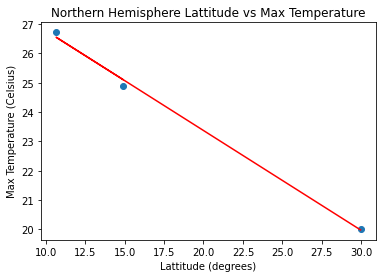

In [15]:
# Separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and 
# Southern Hemisphere (less than 0 degrees latitude)
# After each pair of plots, take the time to explain what the linear regression is modeling. 
# For example, describe any relationships you notice and any other analysis you may have.

# Set-up and initialize variables 
city_counter = 0
northern_city_counter = 0
southern_city_counter = 0
northern_hemisphere_city = []
southern_hemisphere_city = []
      
# Make a new DataFrame equal to the city data (aka weather_data) to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
northern_hemisphere_data = clean_city_data
southern_hemisphere_data = clean_city_data

print("clean_city_data")
print(clean_city_data)
print()

# Create Northen Hemisphere and Southern Hemisphere lists
for city_counter in range(0, len(clean_city_data)):
    if clean_city_data["lat"][city_counter] >= 0:
        #print('northern_hemisphere_city')
        #print(f'Latitude for Northen Hemisphere city {clean_city_data["city"][city_counter]}') 
        #print(' #{city_counter} received is: {lat}')
        ##print(f'Lattitude for city {city[city_counter]} #{city_counter} is Northen Hemisphere: {clean_city_data["lat"][city_counter]}')
        northern_hemisphere_city.append(city_counter)
        #print("northern_hemisphere_city")
        #print(northern_hemisphere_city)
        #print()
        # Drop southern_hemisphere_data point from northern_hemisphere_data    
        southern_hemisphere_data=southern_hemisphere_data.drop(city_counter, inplace=False)
#         print("southern_hemisphere_data")
#         print(southern_hemisphere_data)
#         print()
    else:
        # Southern_hemisphere_city
        southern_hemisphere_city.append(city_counter)
#         print("southern_hemisphere_city")
#         print(southern_hemisphere_city)
#         print()
        # Drop southern_hemisphere_data point from northern_hemisphere_data      
        northern_hemisphere_data=northern_hemisphere_data.drop(city_counter, inplace=False)
#         print("northern_hemisphere_data")
#         print(northern_hemisphere_data)
#         print()

    city_counter += 1 
          
print("northern_hemisphere_city")
print(northern_hemisphere_city)
print()
print("southern_hemisphere_city")
print(southern_hemisphere_city)
print()

print("northern_hemisphere_data")
print(northern_hemisphere_data)
print()
print("southern_hemisphere_data")
print(southern_hemisphere_data)
print()
          

x_values = northern_hemisphere_data["lat"]
y_values = northern_hemisphere_data["TempMax"]


print("x_values")
print(x_values)
print()
print("y_values")
print(y_values)
print()

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print("slope, intercept, rvalue, pvalue, stderr")
print(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Max Temperature (Celsius)")
plt.title('Northern Hemisphere Lattitude vs Max Temperature')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

x_values
0    26.22
1    19.92
4    35.93
5    11.06
Name: TempMax, dtype: float64

y_values
0   -23.1203
1   -10.1308
4   -39.0333
5   -53.1500
Name: lat, dtype: float64

The correlation between both factors is 0.21
slope, intercept, rvalue, pvalue, stderr
0.3708079323301622 -39.991935684477 0.20743108389629644 0.7925689161037036 1.2365448566203239
line_eq is: y = 0.37x + -39.99


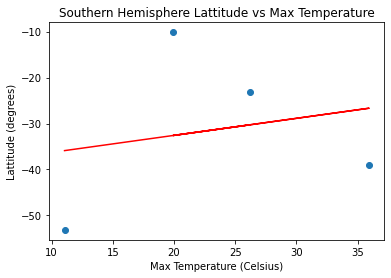

In [16]:
x_values = southern_hemisphere_data["TempMax"]
y_values = southern_hemisphere_data["lat"]



print("x_values")
print(x_values)
print()
print("y_values")
print(y_values)
print()

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print("slope, intercept, rvalue, pvalue, stderr")
print(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Max Temperature (Celsius)")
plt.ylabel("Lattitude (degrees)")
plt.title('Southern Hemisphere Lattitude vs Max Temperature')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x_values
2    61
3    15
6    36
Name: Humidity, dtype: int64

y_values
2    14.8961
3    10.6667
6    29.9502
Name: lat, dtype: float64

The correlation between both factors is 0.16
slope, intercept, rvalue, pvalue, stderr
0.07012991829038341 15.886149717159022 0.15934325616772319 0.8981246830247475 0.43449523287257585
line_eq is: y = 0.07x + 15.89


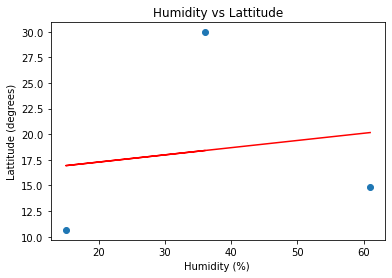

In [17]:
x_values = northern_hemisphere_data["Humidity"]
y_values = northern_hemisphere_data["lat"]


print("x_values")
print(x_values)
print()
print("y_values")
print(y_values)
print()

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print("slope, intercept, rvalue, pvalue, stderr")
print(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Humidity (%) ")
plt.ylabel("Lattitude (degrees)")
plt.title('Humidity vs Lattitude')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x_values
0    68
1    73
4    15
5    46
Name: Humidity, dtype: int64

y_values
0   -23.1203
1   -10.1308
4   -39.0333
5   -53.1500
Name: lat, dtype: float64

The correlation between both factors is 0.67
slope, intercept, rvalue, pvalue, stderr
0.474108408982322 -55.30107465360726 0.668654434581279 0.33134556541872096 0.3728075645258587
line_eq is: y = 0.47x + -55.3


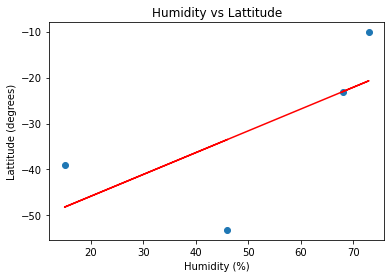

In [18]:
x_values = southern_hemisphere_data["Humidity"]
y_values = southern_hemisphere_data["lat"]


print("x_values")
print(x_values)
print()
print("y_values")
print(y_values)
print()

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print("slope, intercept, rvalue, pvalue, stderr")
print(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Humidity (%)")
plt.ylabel("Lattitude (degrees)")
plt.title('Humidity vs Lattitude')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values
2    75
3     5
6     0
Name: Cloudiness, dtype: int64

y_values
2    14.8961
3    10.6667
6    29.9502
Name: lat, dtype: float64

The correlation between both factors is -0.36
slope, intercept, rvalue, pvalue, stderr
-0.08809639810426538 20.853570616113746 -0.364472402250304 0.7624986994543042 0.22508320386449954
line_eq is: y = -0.09x + 20.85


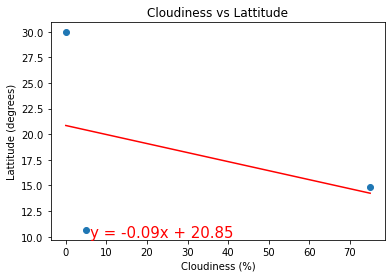

In [19]:
x_values = northern_hemisphere_data["Cloudiness"]
y_values = northern_hemisphere_data["lat"]


print("x_values")
print(x_values)
print()
print("y_values")
print(y_values)
print()

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print("slope, intercept, rvalue, pvalue, stderr")
print(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Lattitude (degrees)")
plt.title('Cloudiness vs Lattitude')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values
0     1
1    92
4     0
5    75
Name: Cloudiness, dtype: int64

y_values
0   -23.1203
1   -10.1308
4   -39.0333
5   -53.1500
Name: lat, dtype: float64

The correlation between both factors is 0.12
slope, intercept, rvalue, pvalue, stderr
0.04646586579471137 -33.31016636337788 0.12013641626932516 0.8798635837306749 0.27151103999329607
line_eq is: y = 0.05x + -33.31


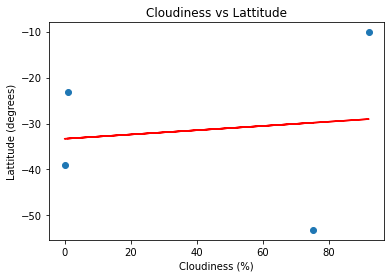

In [20]:
x_values = southern_hemisphere_data["Cloudiness"]
y_values = southern_hemisphere_data["lat"]


print("x_values")
print(x_values)
print()
print("y_values")
print(y_values)
print()

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print("slope, intercept, rvalue, pvalue, stderr")
print(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Lattitude (degrees)")
plt.title('Cloudiness vs Lattitude')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values
2    61
3    15
6    36
Name: Humidity, dtype: int64

y_values
2    14.8961
3    10.6667
6    29.9502
Name: lat, dtype: float64

The correlation between both factors is 0.16
slope, intercept, rvalue, pvalue, stderr
0.07012991829038341 15.886149717159022 0.15934325616772319 0.8981246830247475 0.43449523287257585
line_eq is: y = 0.07x + 15.89


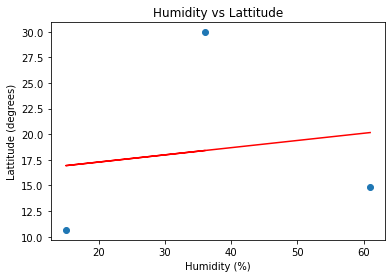

In [21]:
x_values = northern_hemisphere_data["Humidity"]
y_values = northern_hemisphere_data["lat"]


print("x_values")
print(x_values)
print()
print("y_values")
print(y_values)
print()

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print("slope, intercept, rvalue, pvalue, stderr")
print(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Humidity (%)")
plt.ylabel("Lattitude (degrees)")
plt.title('Humidity vs Lattitude')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values
0    68
1    73
4    15
5    46
Name: Humidity, dtype: int64

y_values
0   -23.1203
1   -10.1308
4   -39.0333
5   -53.1500
Name: lat, dtype: float64

The correlation between both factors is 0.67
slope, intercept, rvalue, pvalue, stderr
0.474108408982322 -55.30107465360726 0.668654434581279 0.33134556541872096 0.3728075645258587
line_eq is: y = 0.47x + -55.3


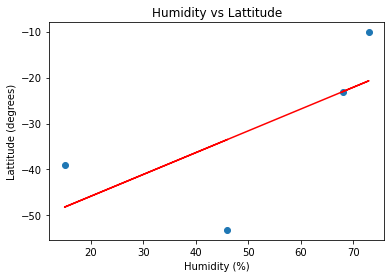

In [22]:
x_values = southern_hemisphere_data["Humidity"]
y_values = southern_hemisphere_data["lat"]


print("x_values")
print(x_values)
print()
print("y_values")
print(y_values)
print()

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print("slope, intercept, rvalue, pvalue, stderr")
print(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Humidity (%)")
plt.ylabel("Lattitude (degrees)")
plt.title('Humidity vs Lattitude')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()